# **Capstone UAS : Bengkel Koding (Data Science - DS01) <br> Pemodelan dan Evaluasi**
Nama : Sherina Nur Anggraeni <br>
NIM  : A11.2022.14374 <br>
Link : https://colab.research.google.com/drive/11sanS8XBmy29UH7XlFMvxDhPNLx9inuc?usp=sharing <br>
Github : https://github.com/SherinaNA/CapstoneUAS_BengKod

##**1. Exploratory Data Analysis (EDA)**

In [1]:
# Import Library
import pandas as pd # untuk melakukan manipulasi, analisis, dan visualisasi data
import numpy as np # NumPy menyediakan berbagai fungsi untuk melakukan operasi numerik
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # library yang dibangun di atas Matplotlib
from sklearn.preprocessing import LabelEncoder # Library untuk Label Encoding (mengubah nilai fitur kategorikal menjadi numerik)
import pickle
import os
import time
from sklearn.model_selection import train_test_split # library train split data
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # libary untuk smore oversampling
from imblearn.over_sampling import SMOTENC
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # evaluasi model

In [2]:
# Menghubungkan gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca dataset pada gdrive
df = pd.read_csv('/content/drive/MyDrive/BengkelKoding/CapstoneUAS/ObesityDataSet.csv')
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Ubah nama kolom (agar mudah dibaca)
df.rename(columns={
    'Gender': 'Gender',
    'Age'   : 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'FamilyHistoryOverweight',
    'FAVC'  : 'HighCalorieFood',
    'FCVC'  : 'VegetableConsumption',
    'NCP'   : 'MealFrequency',
    'CAEC'  : 'SnackConsumption',
    'SMOKE' : 'Smoking',
    'CH2O'  : 'WaterIntake',
    'SCC'   : 'CalorieMonitoring',
    'FAF'   : 'PhysicalActivity',
    'TUE'   : 'TechnologyUse',
    'CALC'  : 'AlcoholConsumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'ObesityLevel'
}, inplace=True)

# Menampilkan 5 data dengan nama kolom baru
df.head(10)

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


- sekilas masih tampak dan terdapat nilai yang outlier

In [5]:
# Menampilkan Informasi umum dari dataset
df.info()

# Deskripsi statistik data numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      2097 non-null   object
 1   Gender                   2102 non-null   object
 2   Height                   2099 non-null   object
 3   Weight                   2100 non-null   object
 4   AlcoholConsumption       2106 non-null   object
 5   HighCalorieFood          2100 non-null   object
 6   VegetableConsumption     2103 non-null   object
 7   MealFrequency            2099 non-null   object
 8   CalorieMonitoring        2101 non-null   object
 9   Smoking                  2106 non-null   object
 10  WaterIntake              2105 non-null   object
 11  FamilyHistoryOverweight  2098 non-null   object
 12  PhysicalActivity         2103 non-null   object
 13  TechnologyUse            2102 non-null   object
 14  SnackConsumption         2100 non-null  

,Age,Gender,Height,Weight,AlcoholConsumption,HighCalorieFood,VegetableConsumption,MealFrequency,CalorieMonitoring,Smoking,WaterIntake,FamilyHistoryOverweight,PhysicalActivity,TechnologyUse,SnackConsumption,Transportation,ObesityLevel
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


- type data masih berupa object semua (harus diubah menjadi bentuk kategorikal, numerik, dll)
- dataset masih memuat missing values (nan, ?, dll)
- masih ada fitur dengan yang memiliki nilai unique yang belum tepat (gender 3 nilai unique, dll)

In [6]:
# Cek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
AlcoholConsumption,5
HighCalorieFood,11
VegetableConsumption,8
MealFrequency,12
CalorieMonitoring,10
Smoking,5


- jumlah data dengan nilai missing value pada setiap fitur

In [7]:
# Cek unique value tiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
AlcoholConsumption,5
HighCalorieFood,3
VegetableConsumption,808
MealFrequency,637
CalorieMonitoring,3
Smoking,3


- menampilkan jumlah nilai unique pada setiap fitur

In [8]:
# Cek data duplikat
df.duplicated().sum()

np.int64(18)

In [9]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1394
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 3
Nilai unik: ['Female' 'Male' '?' nan]

Kolom: Height
Jumlah nilai unik: 1562
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1518
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom: HighCalorieFood
Jumlah nilai unik: 3
Nilai unik: ['no' 'yes' '?' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 808
Nilai unik: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.34

In [10]:
# Mengecek dan mengganti missing values
df.replace('?', np.nan, inplace=True)  # Mengubah '?' menjadi NaN

In [11]:
# Replace 'no' jadi 'No' pada kolom SnackConsumption dan AlcoholConsumption
df['SnackConsumption'] = df['SnackConsumption'].replace('no', 'No')
df['AlcoholConsumption'] = df['AlcoholConsumption'].replace('no', 'No')

In [12]:
# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Age
Jumlah nilai unik: 1393
Nilai unik: ['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom: Gender
Jumlah nilai unik: 2
Nilai unik: ['Female' 'Male' nan]

Kolom: Height
Jumlah nilai unik: 1561
Nilai unik: ['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom: Weight
Jumlah nilai unik: 1517
Nilai unik: ['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom: AlcoholConsumption
Jumlah nilai unik: 4
Nilai unik: ['No' 'Sometimes' 'Frequently' nan 'Always']

Kolom: HighCalorieFood
Jumlah nilai unik: 2
Nilai unik: ['no' 'yes' nan]

Kolom: VegetableConsumption
Jumlah nilai unik: 807
Nilai unik: ['2' '3' '1' nan '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658'

- value '?' sudah diubah kebentuk nan
- value no sudah diubah kebentuk No

In [13]:
# List semua kolom numeric yang mau dicek
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())


Kolom: Age
Age
18           124
26            99
21            96
23            89
19            59
            ... 
31.426573      1
34.369686      1
33.690239      1
37.496175      1
18.701766      1
Name: count, Length: 1393, dtype: int64

Kolom: Height
Height
1.7         58
1.65        50
1.6         41
1.75        39
1.62        36
            ..
1.699474     1
1.621048     1
1.560029     1
1.835678     1
1.701397     1
Name: count, Length: 1561, dtype: int64

Kolom: Weight
Weight
80           58
50           42
70           41
75           39
60           36
             ..
97.92035      1
88.431954     1
86.963628     1
84.315608     1
89.802492     1
Name: count, Length: 1517, dtype: int64

Kolom: VegetableConsumption
VegetableConsumption
3           647
2           592
1            33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64

Kolom: MealFrequency
MealF

In [14]:
# Fitur kategorikal dan biner
categorical_cols = ['Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
                    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption',
                    'Transportation', 'ObesityLevel']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [15]:
# Fitur integer
integer_cols = ['VegetableConsumption', 'TechnologyUse', 'MealFrequency', 'WaterIntake', 'PhysicalActivity']

for col in integer_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')

# Fitur kontinu
continuous_cols = ['Age', 'Height', 'Weight']

# Age → round ke integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Height → 2 desimal
df['Height'] = pd.to_numeric(df['Height'], errors='coerce').round(2)

# Weight → 1 desimal
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').round(1)


In [16]:
# Menampilkan Informasi umum dari dataset (cek typedata setelah diganti)
df.info()

# Deskripsi statistik data numerik (setelah dilakukan perubahan)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      2089 non-null   Int64   
 1   Gender                   2089 non-null   category
 2   Height                   2089 non-null   float64 
 3   Weight                   2092 non-null   float64 
 4   AlcoholConsumption       2091 non-null   category
 5   HighCalorieFood          2089 non-null   category
 6   VegetableConsumption     2093 non-null   Int64   
 7   MealFrequency            2089 non-null   Int64   
 8   CalorieMonitoring        2093 non-null   category
 9   Smoking                  2098 non-null   category
 10  WaterIntake              2096 non-null   Int64   
 11  FamilyHistoryOverweight  2088 non-null   category
 12  PhysicalActivity         2092 non-null   Int64   
 13  TechnologyUse            2096 non-null   Int64   
 14  SnackCon

,Age,Height,Weight,VegetableConsumption,MealFrequency,WaterIntake,PhysicalActivity,TechnologyUse
count,2089.0,2089.000000,2092.000000,2093.0,2089.0,2096.0,2092.0,2096.0
mean,24.72044,1.706573,88.608174,2.449116,2.732408,2.036737,1.071224,0.686546
std,8.399528,0.117753,36.154784,0.685074,1.003207,0.800409,1.187047,0.775847
min,14.0,1.450000,39.000000,1.0,1.0,1.0,0.0,0.0
25%,20.0,1.630000,66.000000,2.0,3.0,2.0,0.0,0.0
50%,23.0,1.700000,83.000000,2.0,3.0,2.0,1.0,1.0
75%,26.0,1.770000,108.025000,3.0,3.0,2.0,2.0,1.0
max,106.0,2.850000,441.100000,9.0,12.0,9.0,12.0,8.0


In [17]:
# List semua kolom numeric yang mau dicek setelah dibulatkan
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 52
Age
21     235
23     214
26     208
18     207
19     169
22     160
20     148
24      95
25      81
17      69
31      60
30      51
27      41
33      35
38      34
29      31
34      29
32      25
37      24
39      24
28      20
41      20
35      19
16      19
40      19
36       6
42       6
44       6
55       5
45       3
43       3
46       2
51       2
88       1
52       1
61       1
56       1
94       1
15       1
14       1
89       1
97       1
99       1
103      1
105      1
48       1
47       1
106      1
91       1
92       1
96       1
101      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 61
Height
1.70    122
1.75    120
1.62     94
1.76     93
1.65     87
       ... 
2.70      1
1.95      1
1.94      1
2.63      1
2.85      1
Name: count, Length: 61, dtype: int64

Kolom: Weight
Jumlah nilai unik: 697
Weight
80.0     62
50.0     44
70.0     42
75.0     40
60.0     37
         ..
41.4      1
49.5      1
81.4     

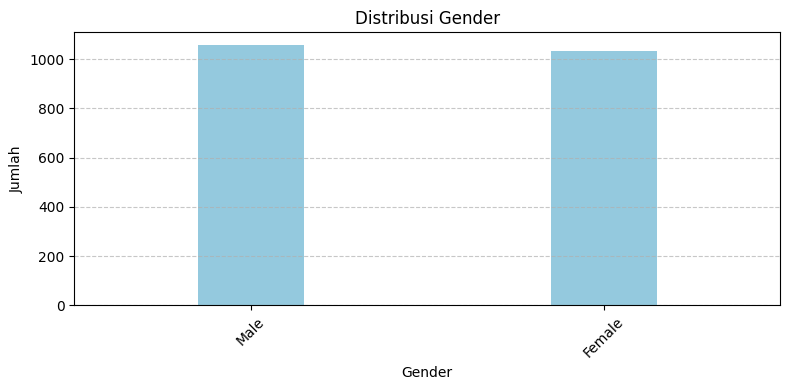

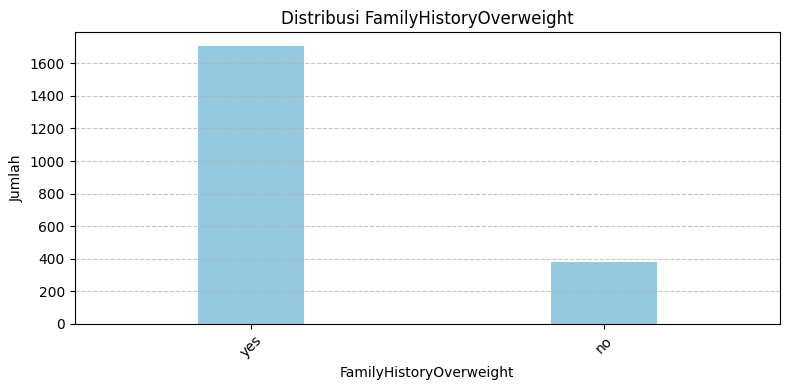

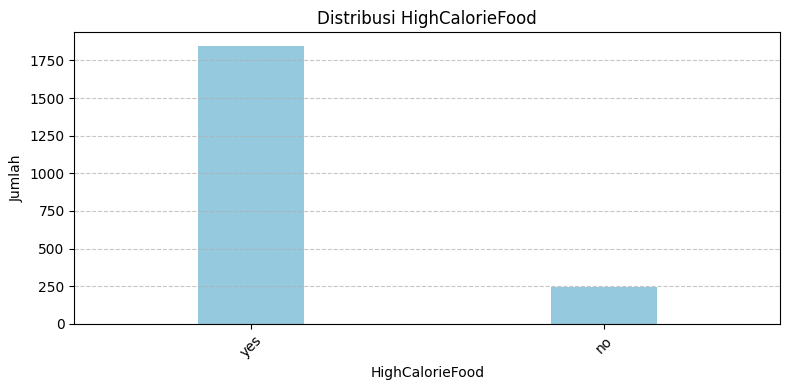

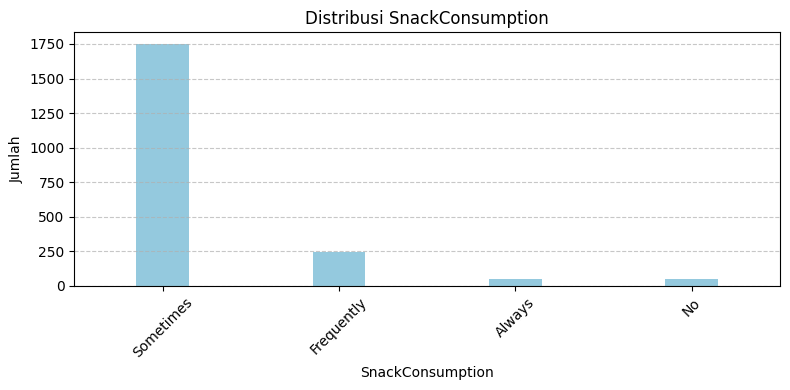

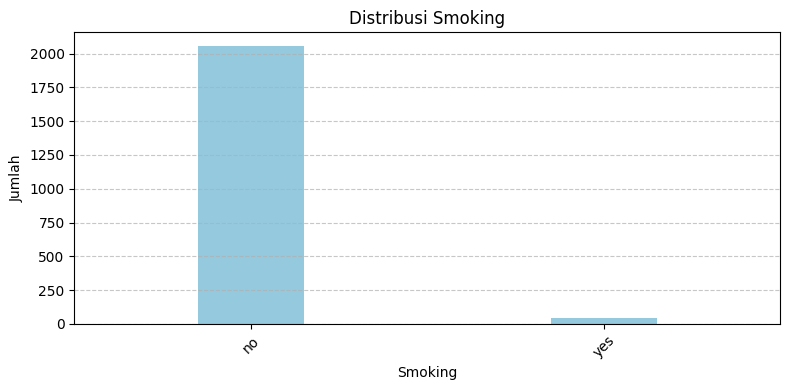

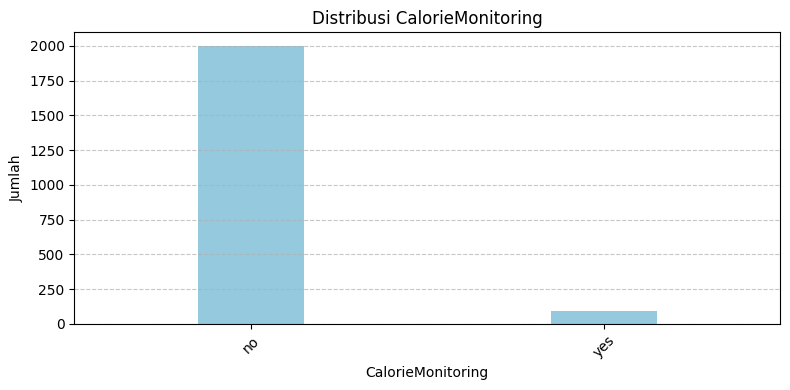

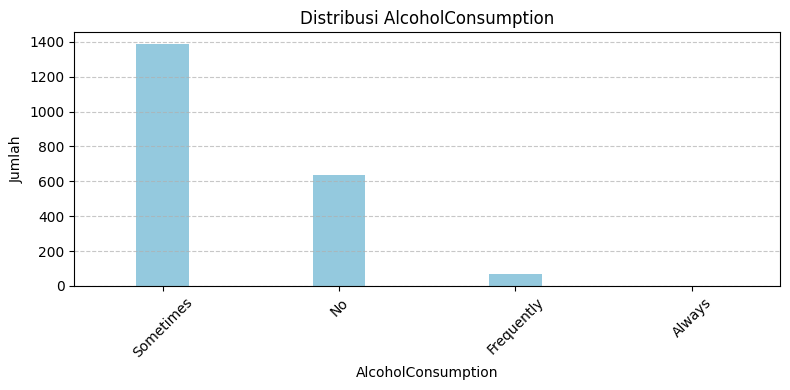

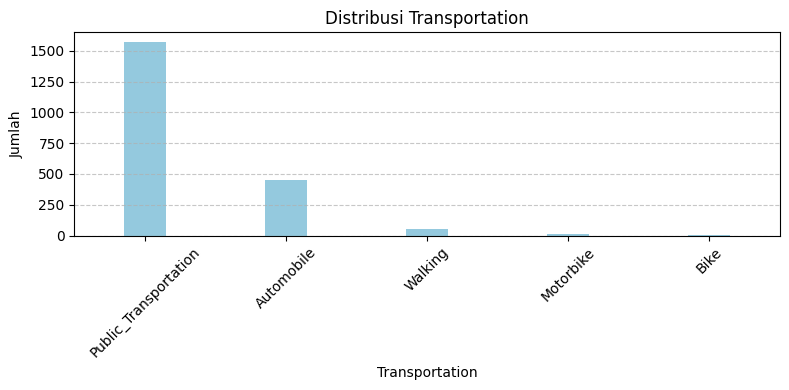

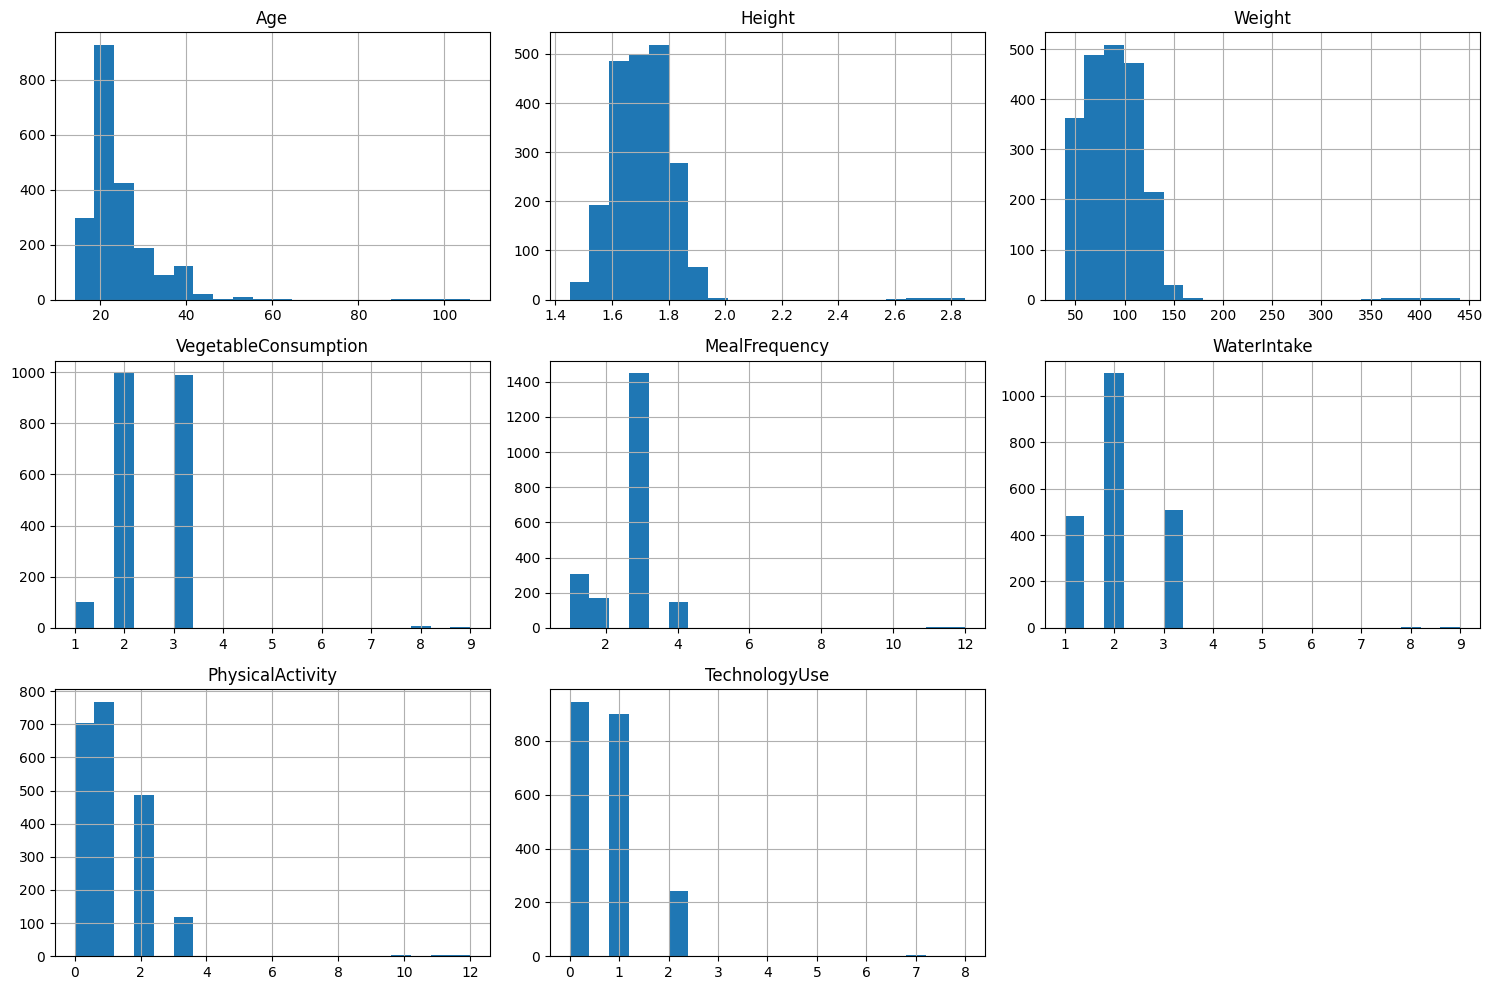

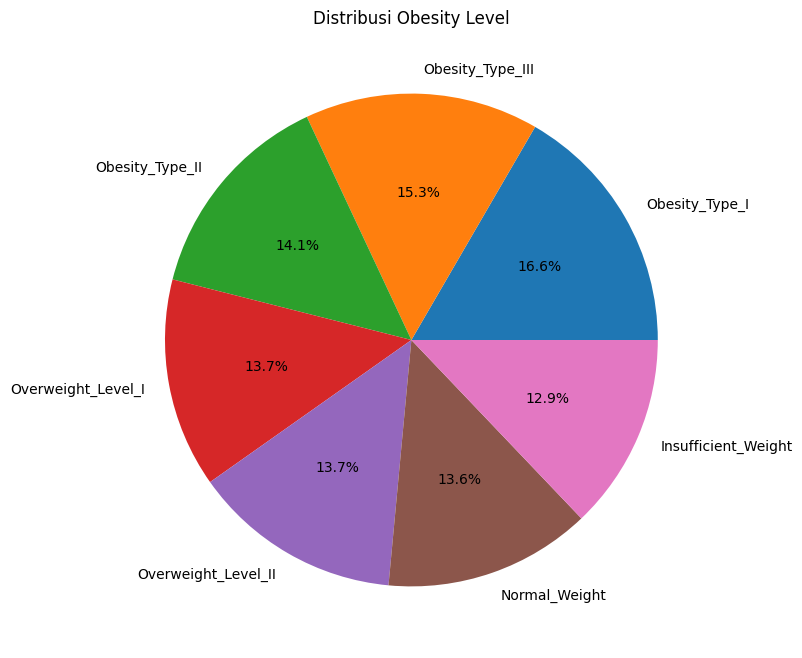

<ipython-input-18-3c3a36525dae>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


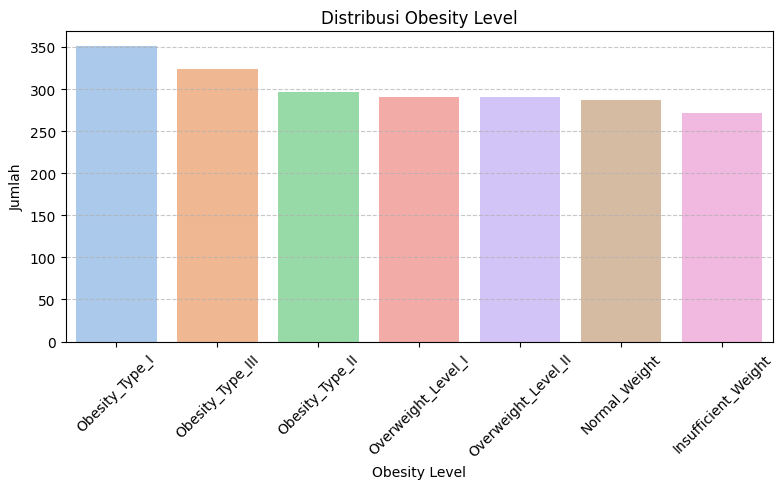

In [18]:
# Daftar fitur kategori
categorical_cols = [
    'Gender', 'FamilyHistoryOverweight', 'HighCalorieFood', 'SnackConsumption',
    'Smoking', 'CalorieMonitoring', 'AlcoholConsumption', 'Transportation'
]

# Plot bar untuk setiap fitur kategori
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue', width=0.3)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Histogram untuk numeric feature
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Pie chart distribusi target
df['ObesityLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribusi Obesity Level')
plt.ylabel('')
plt.show()

# Bar chart distribusi target
plt.figure(figsize=(8, 5))
sns.countplot(
    x='ObesityLevel',
    data=df,
    palette='pastel',  # gunakan palette agar tiap kategori beda warna
    order=df['ObesityLevel'].value_counts().index
)
plt.title('Distribusi Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

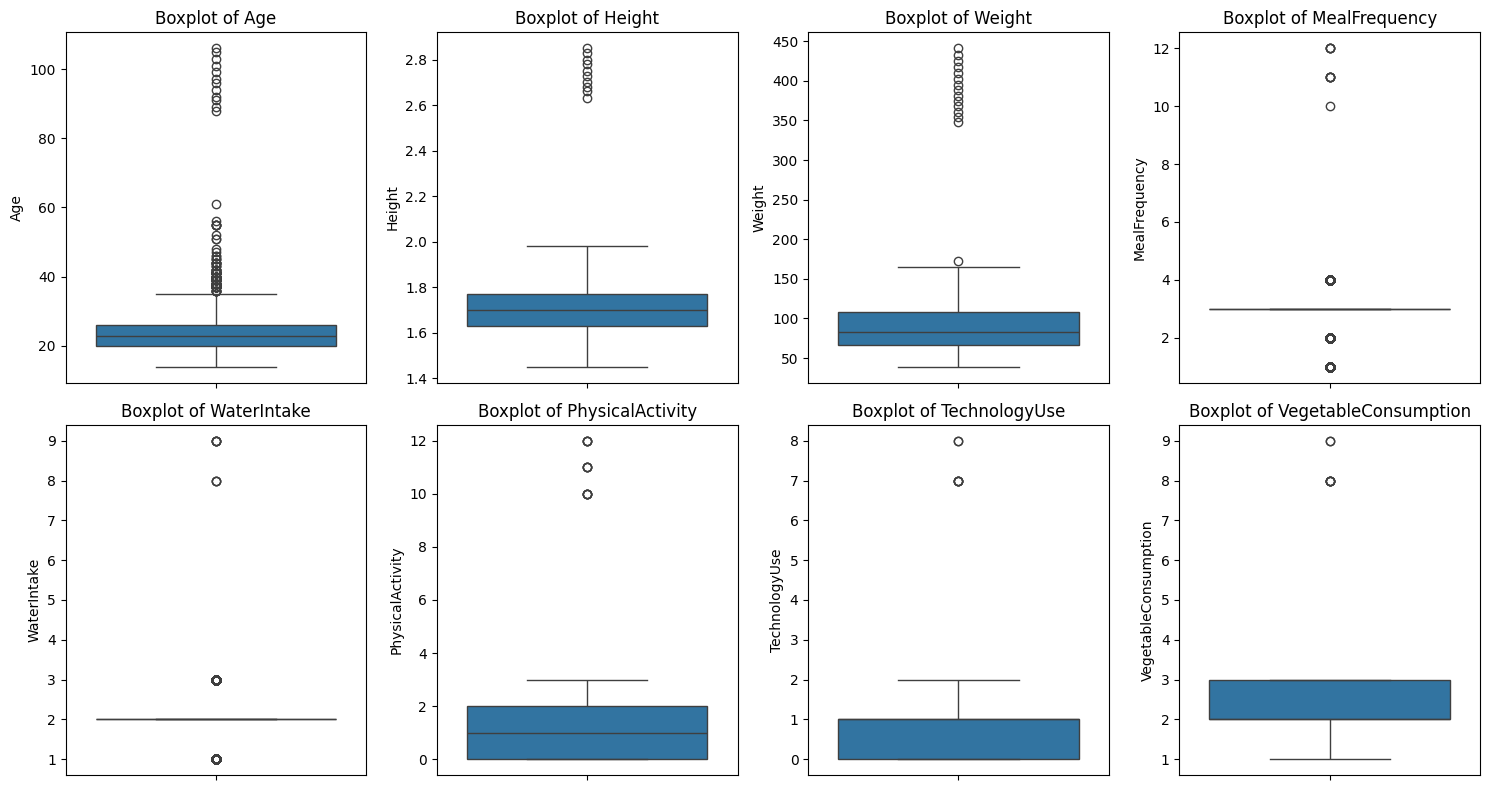

In [19]:
# Boxplot untuk numeric feature
numeric_columns = ['Age', 'Height', 'Weight', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

###**Kesimpulan dari hasil EDA (Exploratory Data Analysis)**

- Type data dan missing value => setelah dilakukkan pengecekkan menggunakan nilai unique ditemukan kolom yang mimiliki nilai '?' dan kosong (missing value), ditemukan beberapa record duplikat (18) record data, typedata awal (semula) bertype object semua, agar memudahkan untuk proses selanjutnya harus diubah terlebih dahulu ke type data sesuai dengan kebutuhan (soal)
- Beberapa fitur seperti Age, Height, Weight memiliki distribusi yang relatif normal, namun masih menunjukkan indikasi outlier
- Beberapa nilai dari masing-masing  fitur numerik memiliki nilai yang yang sangat bervariasi (banyak angka dibelakang koma) padahal seharusnya berupa bilangan bulat, harus dilakukan pembulatan sesuai dengan type data yang telah disepakati (memudahkan dalam melihat rentang nilai, untuk mengatasi outlier)
- Distribusi fitur kategorikal masih memiliki values yang inkonsisten, harus dilakukan penyesuaian unique value agar konsisten
- Distribusi Target dari hasil visualisasi dari bar chart, menunjukkan kelas target yang kurang seimbang (imbalance). Beberapa kelas seperti Obesity_Type_III lebih sedikit dibanding Normal_Weight atau Overweight_Level_I. mungkin perlu handling imbalance data (seperti oversampling, undersampling, atau SMOTE).

##**2. Preprocessing Data**

####**Penanganan Data Duplikat**

In [20]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

####**Penanganan Missing Value**

In [21]:
# Tangani missing value numerik dengan mean
numerical_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                  'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

for col in numerical_cols:
    # Menghitung rata-rata
    mean_value = df[col].mean()
    # convert rata-rata (jika float) maka akan di-integer-kan
    if col in ['Age', 'VegetableConsumption', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse']:
        fill_value = int(round(mean_value)) # Pembulatan ke nilai integer
    else:
        fill_value = mean_value # Use the float mean for float columns (Height, Weight)

    # Mengatasi FutureWarning: Tetapkan kembali hasil fillna ke kolom
    df[col] = df[col].fillna(fill_value)

- karena type data numerik ini ada yang bersifat float dan integer, maka untuk fitur 'Age', 'VegetableConsumption', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse' apabila rata-ratanya menjadi nilai float, maka akan dilakukan pembulatan ke nilai integer

In [22]:
# Tangani missing value kategorikal dengan modus
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

for col in categorical_cols:
    # Ambil nilai modus (mode)
    mode_value = df[col].mode()[0]
    # Mengatasi FutureWarning: Tetapkan kembali hasil fillna ke kolom
    df[col] = df[col].fillna(mode_value)

- Kenapa pakai fillna() dengan assignment df[col] = ...?
- Di Pandas versi baru, kalau langsung pakai inplace=True di method chaining kadang muncul warning.
- Lebih aman & clean dengan cara meng-assign hasil fillna ke kolomnya langsung.

In [23]:
# Cek apakah masih ada missing value
print(df.isnull().sum())

Age                        0
Gender                     0
Height                     0
Weight                     0
AlcoholConsumption         0
HighCalorieFood            0
VegetableConsumption       0
MealFrequency              0
CalorieMonitoring          0
Smoking                    0
WaterIntake                0
FamilyHistoryOverweight    0
PhysicalActivity           0
TechnologyUse              0
SnackConsumption           0
Transportation             0
ObesityLevel               0
dtype: int64


####**Penanganan Data Outlier**

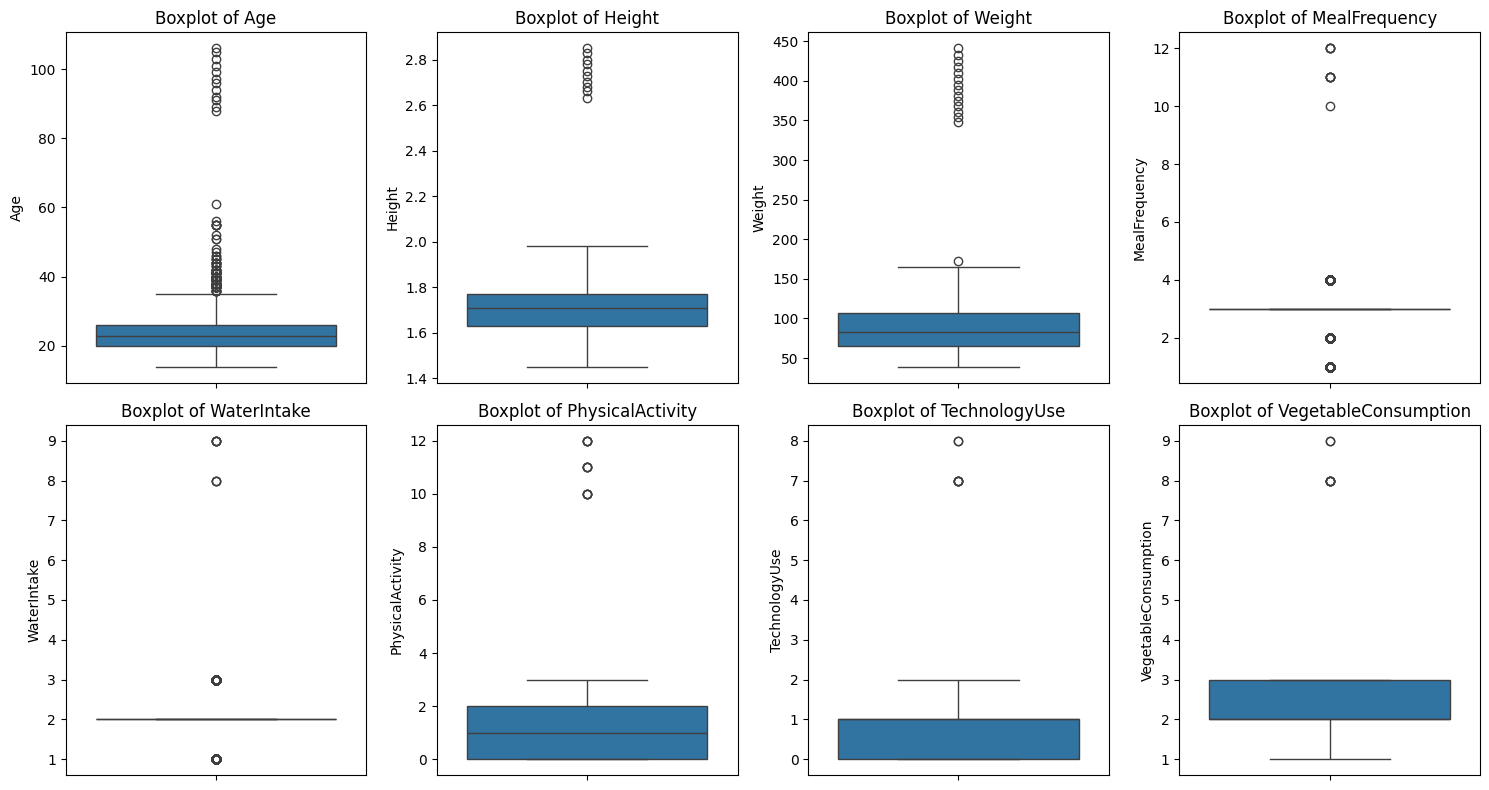

In [24]:
# Boxplot untuk check nilai outlier pada fitur numerik
numeric_columns = ['Age', 'Height', 'Weight', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [25]:
# Penanganan nilai outlier menggunakan nilai modus (yang sering muncul)
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Cek jumlah outlier sebelum ditangani (untuk kolom selain MealFrequency & WaterIntake)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f'Jumlah outlier di kolom {col} sebelum ditangani: {outliers_count}')

Jumlah outlier di kolom Age sebelum ditangani: 171
Jumlah outlier di kolom Height sebelum ditangani: 10
Jumlah outlier di kolom Weight sebelum ditangani: 15
Jumlah outlier di kolom PhysicalActivity sebelum ditangani: 12
Jumlah outlier di kolom TechnologyUse sebelum ditangani: 7
Jumlah outlier di kolom VegetableConsumption sebelum ditangani: 8


In [26]:
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Tangani outlier (pakai modus) untuk kolom numeric di atas
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mode_value = df[col].mode()[0]

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mode_value

In [27]:
# Daftar kolom numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

# Cek lagi jumlah outlier setelah ditangani (untuk kolom numeric di atas)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f'Jumlah outlier di kolom {col} setelah ditangani: {outliers_count}')

Jumlah outlier di kolom Age setelah ditangani: 80
Jumlah outlier di kolom Height setelah ditangani: 0
Jumlah outlier di kolom Weight setelah ditangani: 0
Jumlah outlier di kolom PhysicalActivity setelah ditangani: 0
Jumlah outlier di kolom TechnologyUse setelah ditangani: 0
Jumlah outlier di kolom VegetableConsumption setelah ditangani: 0


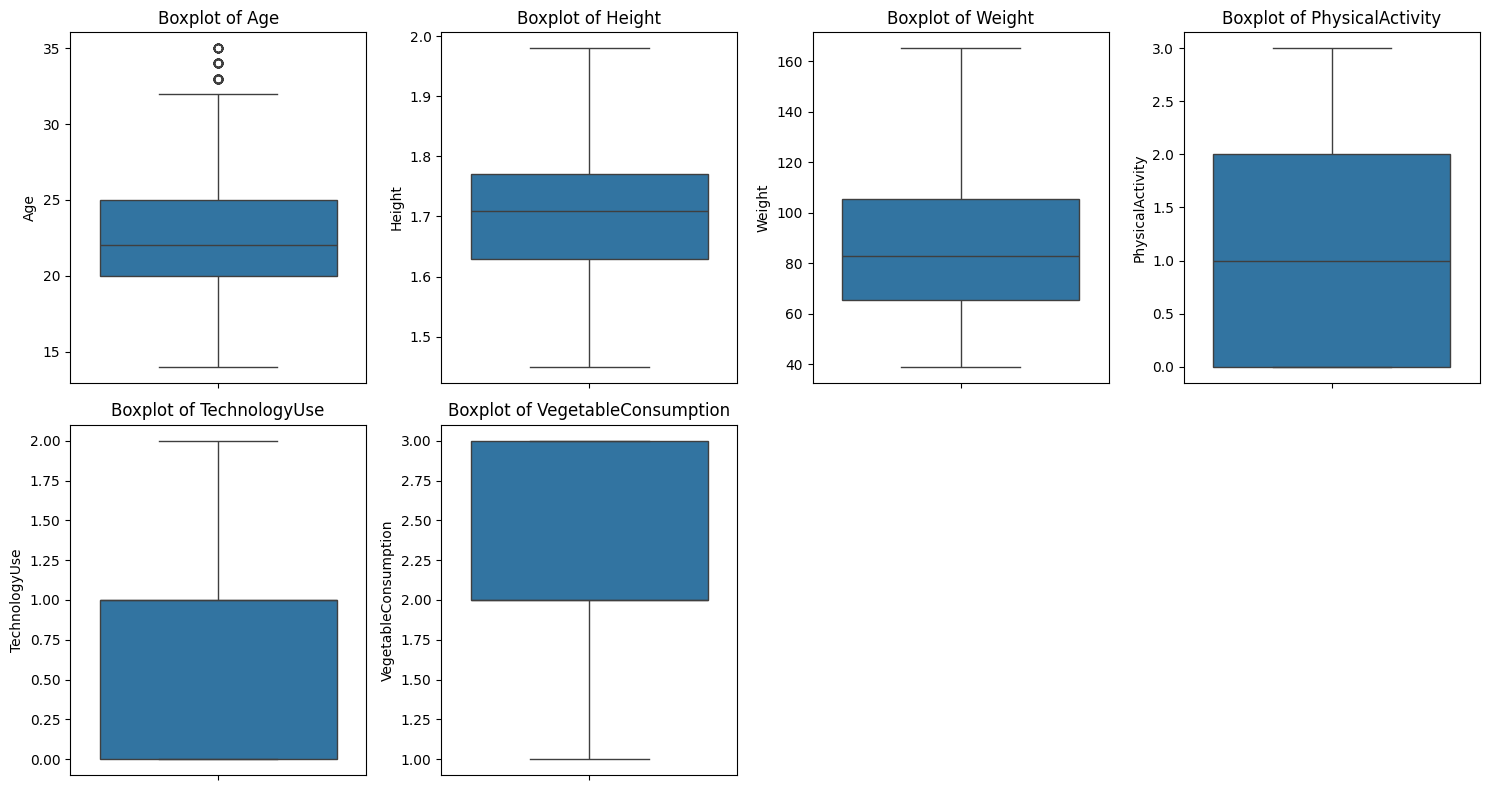

In [28]:
# Boxplot untuk check nilai outlier pada fitur numerik
numeric_columns = ['Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

- pada boxplot age ketika menggunakan pendekatan outlier dengan IQR, rentang usia antara 30-35 tahun dianggapnya sebagai nilai outlier
- namun dalam kasu seperti ini, saya melihat rentang tersebut masih cukup normal
- agar tetap mempertahankan data tetap logis sesuai kenyataan di lapangan, maka nilai tersebut tetap saya pertahankan

In [29]:
# Tangani outlier khusus untuk MealFrequency: keep 1-4, selain itu ganti modus
meal_mode = df['MealFrequency'].mode()[0]
df.loc[~df['MealFrequency'].isin([1, 2, 3, 4]), 'MealFrequency'] = meal_mode

# Tangani outlier khusus untuk WaterIntake: keep 1-3, selain itu ganti modus
water_mode = df['WaterIntake'].mode()[0]
df.loc[~df['WaterIntake'].isin([1, 2, 3]), 'WaterIntake'] = water_mode

- penanganan outlier untuk MealFrequency dan WaterIntake saya pisahkan, agar range nya sesuai dengan domain knowledge
- dimana MealFrequency: keep 1-4 sebagai rentang normalnya dan
- WaterIntake: keep 1-3 sebagai rentang normalnya
- soalnya ketika menggunakan pendekatan dengan IQR, nilai dari fitur MealFrequency dan WaterIntake hanya memberikan 1 nilai unik saja

In [30]:
# List jumlah nilai unik semua kolom numeric
numeric_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MealFrequency',
                'WaterIntake', 'PhysicalActivity', 'TechnologyUse']

# Looping untuk cetak value_counts() tiap kolom
for col in numeric_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(df[col].value_counts())


Kolom: Age
Jumlah nilai unik: 22
Age
21    382
23    210
18    203
26    171
19    168
22    158
20    147
25    101
24     95
17     68
31     60
30     50
27     41
33     34
29     29
34     28
32     25
28     20
16     18
35     18
15      1
14      1
Name: count, dtype: Int64

Kolom: Height
Jumlah nilai unik: 52
Height
1.700000    129
1.750000    117
1.760000     91
1.650000     83
1.600000     74
1.720000     72
1.620000     72
1.770000     69
1.710000     67
1.630000     66
1.780000     64
1.790000     64
1.670000     64
1.740000     64
1.680000     58
1.610000     58
1.800000     57
1.660000     55
1.690000     53
1.640000     51
1.820000     49
1.730000     42
1.810000     39
1.560000     39
1.840000     38
1.850000     37
1.830000     33
1.550000     32
1.570000     30
1.590000     29
1.580000     26
1.530000     24
1.708789     22
1.870000     22
1.860000     21
1.540000     20
1.500000     17
1.520000     15
1.910000     11
1.880000     10
1.510000     10
1.900000      7


####**Ubah data kategori menjadi numerik**

In [31]:
# List kolom kategorikal
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

# Melihat jumlah nilai unik dan daftar nilai unik pada setiap kolom
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")


Kolom: Gender
Jumlah nilai unik: 2
Nilai unik: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Kolom: AlcoholConsumption
Jumlah nilai unik: 4
Nilai unik: ['No', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'No', 'Sometimes']

Kolom: HighCalorieFood
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: CalorieMonitoring
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: Smoking
Jumlah nilai unik: 2
Nilai unik: ['no', 'yes']
Categories (2, object): ['no', 'yes']

Kolom: FamilyHistoryOverweight
Jumlah nilai unik: 2
Nilai unik: ['yes', 'no']
Categories (2, object): ['no', 'yes']

Kolom: SnackConsumption
Jumlah nilai unik: 4
Nilai unik: ['Sometimes', 'Frequently', 'Always', 'No']
Categories (4, object): ['Always', 'Frequently', 'No', 'Sometimes']

Kolom: Transportation
Jumlah nilai unik: 5
Nilai unik: ['Public_Transportation', 'Walking', 'Automobile', 'Mo

In [32]:
# List kolom kategorikal
categorical_cols = ['Gender', 'AlcoholConsumption', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'SnackConsumption',
                    'Transportation', 'ObesityLevel']

# Custom ordinal mapping
ordinal_mappings = {
    'AlcoholConsumption': {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'SnackConsumption': {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
}

# Folder penyimpanan encoder di Google Drive
encoder_dir = '/content/drive/MyDrive/BengkelKoding/CapstoneUAS/encoders'
if not os.path.exists(encoder_dir):
    os.makedirs(encoder_dir)

# LabelEncoder dict untuk fitur binary & nominal
encoders = {}

# Proses encoding
for col in categorical_cols:
    if col in ordinal_mappings:
        # Gunakan custom mapping
        df[col] = df[col].map(ordinal_mappings[col])
    else:
        # Gunakan LabelEncoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
        # Simpan LabelEncoder ke file pickle di Google Drive
        with open(f'{encoder_dir}/{col}_encoder.pkl', 'wb') as f:
            pickle.dump(le, f)

# Simpan ordinal mapping ke file pickle di Google Drive
with open(f'{encoder_dir}/ordinal_mappings.pkl', 'wb') as f:
    pickle.dump(ordinal_mappings, f)

print(f"Encoding selesai & mapping disimpan ke {encoder_dir}")

Encoding selesai & mapping disimpan ke /content/drive/MyDrive/BengkelKoding/CapstoneUAS/encoders


- ordinal_mappings → mapping manual untuk kategori yang punya urutan (misal: No < Sometimes < Frequently < Always).
- Kalau kolom ada di ordinal_mappings → pakai mapping manual.
- Kalau tidak → pakai LabelEncoder untuk ubah kategori jadi angka acak (misal: Female = 0, Male = 1).

In [33]:
categorical_cols = ['Gender', 'HighCalorieFood', 'CalorieMonitoring',
                    'Smoking', 'FamilyHistoryOverweight', 'Transportation', 'ObesityLevel']

mappings = {}

for col in categorical_cols:
    with open(f'{encoder_dir}/{col}_encoder.pkl', 'rb') as f:
        le = pickle.load(f)
    mappings[col] = {i: cls for i, cls in enumerate(le.classes_)}

# Tampilkan semua mapping
for col, mapping in mappings.items():
    print(f"\nMapping {col}: {mapping}")


Mapping Gender: {0: 'Female', 1: 'Male'}

Mapping HighCalorieFood: {0: 'no', 1: 'yes'}

Mapping CalorieMonitoring: {0: 'no', 1: 'yes'}

Mapping Smoking: {0: 'no', 1: 'yes'}

Mapping FamilyHistoryOverweight: {0: 'no', 1: 'yes'}

Mapping Transportation: {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}

Mapping ObesityLevel: {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


####**Menentukan apakah semua feature perlu digunakan.**

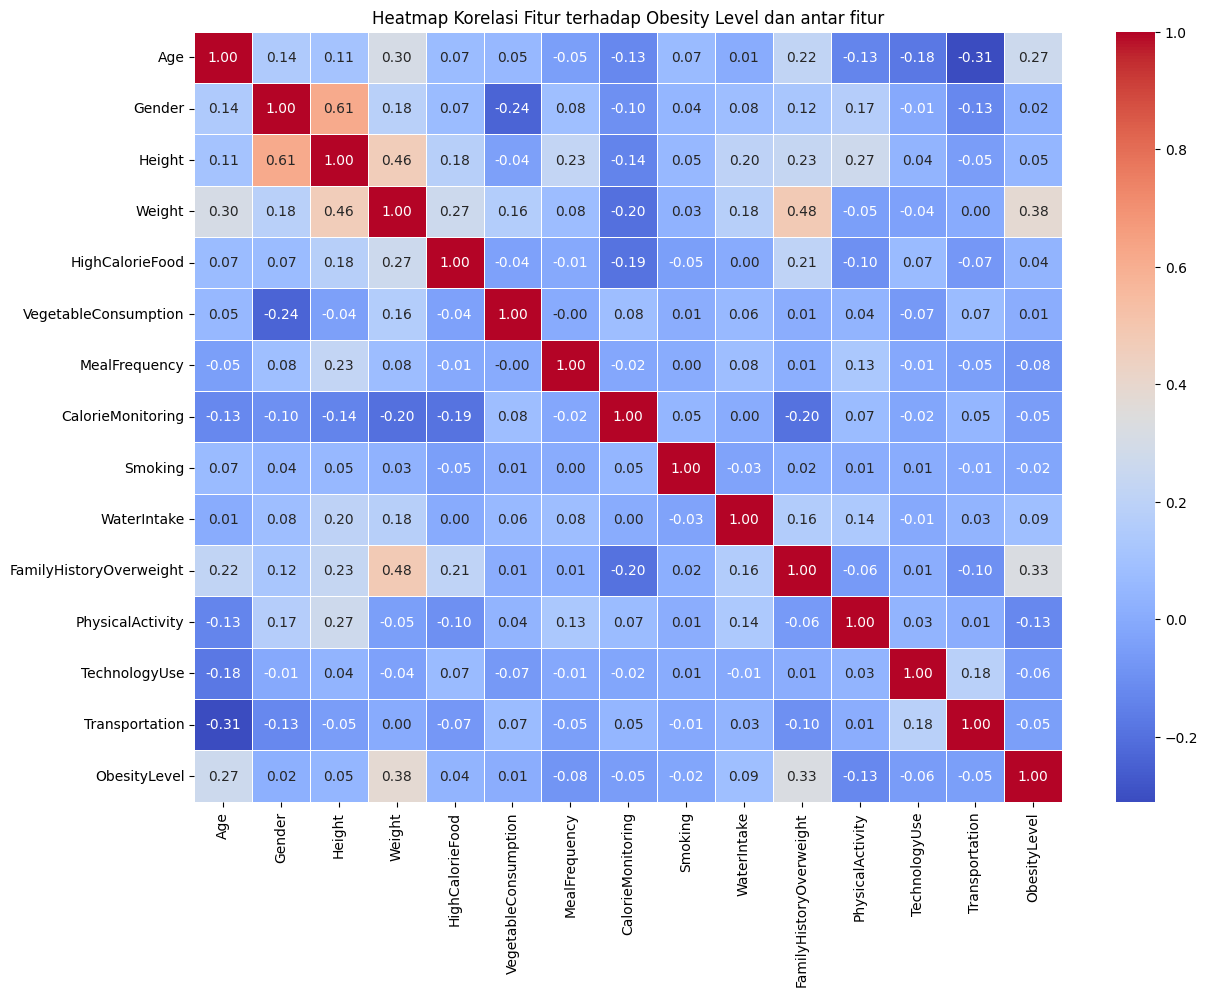

In [34]:
# Hitung matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur terhadap Obesity Level dan antar fitur")
plt.show()


Features selection merupakan hal yang penting karena bisa sangat berpengaruh  ke performa model klasifikasi nantinya. <br> Berdasarkan analisis singkat :
- Gender	**Bisa Relevan**
- Age	**Relevan** (obesitas cenderung naik di usia tertentu)
- Height	**Penting**
- Weight	**Penting**
- FamilyHistoryOverweight	**Relevan** (ada faktor genetis)
- HighCalorieFood  **Relevan**
- VegetableConsumption	**Relevan**
- MealFrequency	**Relevan**
- SnackConsumption **Relevan**
- Smoking **Cenderung kurang signifikan** ke obesitas
- WaterIntake **Relevan**
- CalorieMonitoring **Relevan**
- PhysicalActivity **Penting**
- TechnologyUse **Relatif**
- AlcoholConsumption **Relatif**
- Transportation **Relatif**

###**Kesimpulan dari hasil Preprocessing Data**

- penghapusan data duplikat
- penanganan missing value fitur numerik dengan nilai mean (rata-rata), fitur 'Age', 'VegetableConsumption', 'MealFrequency', 'WaterIntake', 'PhysicalActivity' yang memiliki typedata integer, apabila dihitung rata-rata menghasilkan nilai float, makan harus dibulatkan dulu ke nilai integer Kembali
- Menangani missing value kategorikal dengan modus
- Menangani outlier fitur 'Age', 'Height', 'Weight', 'PhysicalActivity', 'TechnologyUse', 'VegetableConsumption' menggunakan nilai yang sering muncul (modus), dengan mengecheck jumlah nilai outlier menggunakan quantile IQR
- pada boxplot age ketika menggunakan pendekatan outlier dengan IQR, rentang usia antara 30-35 tahun dianggapnya sebagai nilai outlier
- penanganan outlier untuk MealFrequency dan WaterIntake saya pisahkan, agar range nya sesuai dengan domain knowledge, dimana MealFrequency: keep 1-4 sebagai rentang normalnya dan
WaterIntake: keep 1-3 sebagai rentang normalnya. Soalnya ketika menggunakan pendekatan dengan IQR, nilai dari fitur MealFrequency dan WaterIntake hanya memberikan 1 nilai unik saja
- mengubah data kategori menjadi numerik menggunakan LabelEncoder dengan custom ordinal mapping maupun acak dari LabelEncoder, hasil mapping disimpan ke file pickle
- menampilkan heatmap korelasi fitur terhadap Obesity level dan antar semua fitur -> feature selection

##**3. Pemodelan dan Evaluasi**

####**Pisahkan fitur (X) dan target (y) dan Train-Test Split Data**

In [35]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['ObesityLevel', 'Smoking'])  # drop Smoking di sini
y = df['ObesityLevel']

- fitur smoking didrop karena merupakan fitur yang kurang relevan (cenderung kurang signifikan) ke obesity level

In [36]:
# Ensure integer columns have integer dtype before SMOTE
integer_cols_smote = ['VegetableConsumption', 'TechnologyUse', 'MealFrequency', 'WaterIntake', 'PhysicalActivity', 'Age']
for col in integer_cols_smote:
    # Use errors='coerce' to turn any uncastable values into NaN,
    # although missing values should already be handled.
    # Use Int64 to allow for potential NaN if needed, though fillna should have taken care of them.
    X[col] = pd.to_numeric(X[col], errors='coerce').astype('int64')

In [37]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

####**Atasi ketidakseimbangan kelas data**

<ipython-input-38-ad729199911d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


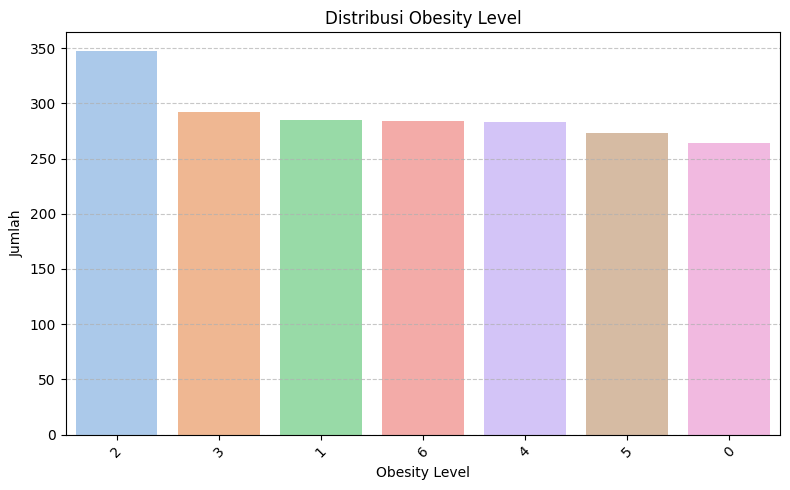

In [38]:
# Bar chart distribusi target
plt.figure(figsize=(8, 5))
sns.countplot(
    x='ObesityLevel',
    data=df,
    palette='pastel',  # gunakan palette agar tiap kategori beda warna
    order=df['ObesityLevel'].value_counts().index
)
plt.title('Distribusi Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Pemisahan proses SMOTE** <br>

Proses SMOTE dipisah karena, SMOTE standar itu interpolasi numerik antar nilai (angka continuous).
Kalau fitur kategorikal yang di-encode (misal 0, 1, 2) diperlakukan seperti numerik continuous, interpolasi-nya bisa jadi nilai pecahan (misal 0.4, 1.7), jadi tidak valid untuk fitur kategori.

In [39]:
# Menentukan index fitur kategorikal (ordinal mapping)
categorical_features = [
    X_train.columns.get_loc('AlcoholConsumption'),
    X_train.columns.get_loc('SnackConsumption')
]

In [40]:
# SMOTENC di training data saja
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

####**Normalisasi atau standarisasi data**

In [41]:
# Identifikasi fitur numerik
numeric_columns = [col for col in X_train.columns if col not in ['AlcoholConsumption', 'SnackConsumption']]

In [42]:
# Scaling data
scaler = StandardScaler()

# Jadikan DataFrame dulu
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Fit ke train smote data
X_train_smote_df[numeric_columns] = scaler.fit_transform(X_train_smote_df[numeric_columns])

# Transform test data
X_test_df[numeric_columns] = scaler.transform(X_test_df[numeric_columns])

# Optional: save scaler
with open('/content/drive/MyDrive/BengkelKoding/CapstoneUAS/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

####**Modeling**

In [46]:
# Modeling: 3 algoritma
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [47]:
# Menyimpan hasil evaluasi
results = {}

####**Training dan Evaluasi**

=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        53
           1       0.65      0.42      0.51        57
           2       0.73      0.78      0.76        69
           3       0.88      0.97      0.92        58
           4       0.98      0.98      0.98        57
           5       0.64      0.53      0.58        55
           6       0.67      0.70      0.68        57

    accuracy                           0.76       406
   macro avg       0.75      0.76      0.75       406
weighted avg       0.75      0.76      0.75       406

Training Time: 0.0101 seconds


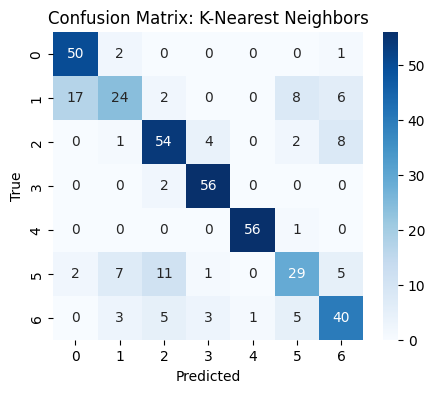

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        53
           1       0.74      0.61      0.67        57
           2       0.88      0.87      0.88        69
           3       0.90      0.98      0.94        58
           4       0.98      0.95      0.96        57
           5       0.71      0.67      0.69        55
           6       0.75      0.77      0.76        57

    accuracy                           0.83       406
   macro avg       0.83      0.83      0.83       406
weighted avg       0.83      0.83      0.83       406

Training Time: 0.1701 seconds


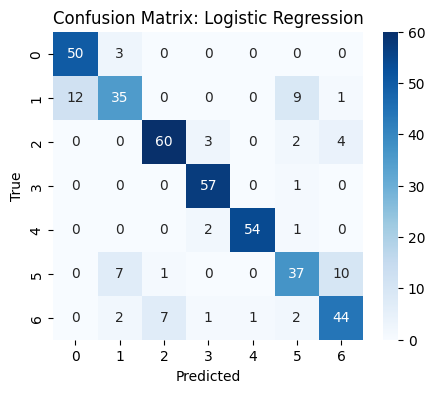

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.88      0.81      0.84        57
           2       0.93      0.90      0.91        69
           3       0.95      0.98      0.97        58
           4       1.00      0.96      0.98        57
           5       0.81      0.93      0.86        55
           6       0.92      0.86      0.89        57

    accuracy                           0.92       406
   macro avg       0.92      0.92      0.92       406
weighted avg       0.92      0.92      0.92       406

Training Time: 0.0141 seconds


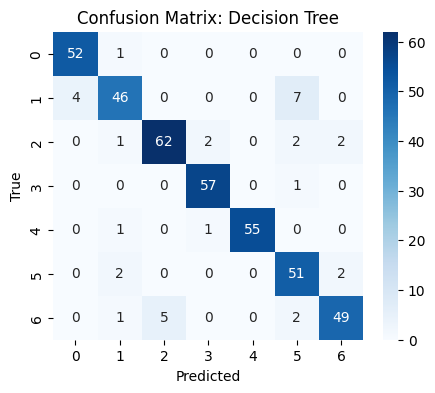

In [49]:
# Training & Evaluasi setiap model
for name, model in models.items():
    print(f"=== {name} ===")

    start_time = time.time()
    # Pakai data hasil SMOTE dan scaling
    model.fit(X_train_smote_df, y_train_smote)
    training_time = time.time() - start_time

    # Prediksi di data test hasil scaling
    y_pred = model.predict(X_test_df)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1-score": report['weighted avg']['f1-score'],
        "training_time": training_time,
        "confusion_matrix": cm,
        "report_text": classification_report(y_test, y_pred)
    }

    # Tampilkan hasil
    print(results[name]["report_text"])
    print(f"Training Time: {training_time:.4f} seconds")

    # Tampilkan confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [50]:
# Buat dataframe hasil evaluasi
summary = pd.DataFrame({
    model: {
        "Accuracy": results[model]["accuracy"],
        "Precision": results[model]["precision"],
        "Recall": results[model]["recall"],
        "F1-Score": results[model]["f1-score"],
        "Training Time (s)": results[model]["training_time"]
    }
    for model in results
}).T

# Tampilkan dalam bentuk tabel
print("\n=== Summary Hasil Evaluasi ===")
print(summary.sort_values(by="Accuracy", ascending=False))


=== Summary Hasil Evaluasi ===
                     Accuracy  Precision    Recall  F1-Score  \
Decision Tree        0.916256   0.918251  0.916256  0.916086   
Logistic Regression  0.830049   0.827966  0.830049  0.827039   
K-Nearest Neighbors  0.761084   0.753509  0.761084  0.750692   

                     Training Time (s)  
Decision Tree                 0.014079  
Logistic Regression           0.170129  
K-Nearest Neighbors           0.010083  


###**Kesimpulan dari hasil Pemodelan dan Evaluasi**

Berdasarkan hasil evaluasi terhadap tiga algoritma klasifikasi yang diterapkan pada dataset, diperoleh beberapa temuan yakni:
- Decision Tree menunjukkan performa terbaik dibandingkan model lainnya, dengan accuracy 91,63%, precision, recall, dan F1-score yang konsisten di angka sekitar 91%, serta waktu training yang sangat cepat (0,014 detik).
- Logistic Regression menghasilkan nilai accuracy 83,00%, precision dan recall yang cukup stabil di angka 82-83%, namun membutuhkan waktu training yang relatif lebih lama (0,17 detik).
- K-Nearest Neighbors (KNN) menunjukkan performa paling rendah di antara ketiga model, dengan accuracy 76,11%, dan nilai F1-score 75,07%, meskipun memiliki waktu training yang sangat cepat (0,010 detik).



Hasil Analisis Umum:
- Decision Tree merupakan algoritma paling optimal untuk dataset ini karena memiliki kombinasi terbaik antara akurasi tinggi, waktu pelatihan singkat, dan konsistensi metrik evaluasi.
- Logistic Regression masih layak dipertimbangkan jika dibutuhkan model yang lebih interpretable, meskipun dengan trade-off di waktu training.
- KNN kurang direkomendasikan untuk dataset ini karena performa prediksinya cukup rendah meskipun cepat dalam pelatihan.

##**4. Hyperparameter Tuning**

###**Kesimpulan dari hasil setelah dilakukan Hyperparameter Tuning**